In [ ]:
!pip install seaborn

# Summary

Dans ce notebook, nous allons mettre explorer les donnees relatives a la qualite de l'air au SENEGAL en utilisant les donnees de la banque mondiale et d'une api que nous vous présenterons dans la suite

Ce notebook s'inscrit dans le cadre de notre projet en Data Engineering


### Thematique du projet

### La qualite de l'air

La qualité de l'air est une mesure de la propreté de l'air dans un environnement donné, qui peut avoir un impact sur la santé humaine, l'environnement et le climat. Deux des principaux indicateurs utilisés pour évaluer la qualité de l'air sont les particules fines PM2.5 et PM10.

PM2.5 (Particulate Matter 2.5) :
Les particules fines PM2.5 sont des particules en suspension dans l'air ayant un diamètre égal ou inférieur à 2.5 micromètres (µm). Elles sont très petites et peuvent pénétrer profondément dans les voies respiratoires lorsqu'elles sont inhalées. Les principales sources de PM2.5 sont les émissions provenant de la combustion de combustibles fossiles (comme les véhicules automobiles, les centrales électriques et les industries), les feux de bois et les activités agricoles. Les PM2.5 peuvent avoir des effets néfastes sur la santé, en particulier sur les voies respiratoires et le système cardiovasculaire, et peuvent aggraver les problèmes respiratoires existants tels que l'asthme et les maladies pulmonaires.
PM10 (Particulate Matter 10) :
Les particules PM10 sont des particules en suspension dans l'air ayant un diamètre égal ou inférieur à 10 micromètres (µm). Elles sont plus grosses que les PM2.5 mais plus petites que les particules visibles à l'œil nu. Les sources de PM10 sont similaires à celles des PM2.5 et incluent les émissions provenant du trafic routier, des industries, de la construction, des activités agricoles, etc. Bien que les PM10 soient moins susceptibles de pénétrer profondément dans les poumons que les PM2.5, elles peuvent encore avoir des effets néfastes sur la santé respiratoire, en particulier chez les personnes sensibles.
La quantité de PM2.5 et de PM10 dans l'air est mesurée à l'aide de capteurs spéciaux et de stations de surveillance de la qualité de l'air. Ces données sont collectées et utilisées pour évaluer la qualité de l'air dans une région donnée et pour informer le public des niveaux de pollution. Des normes et des directives sont établies par les organismes de santé et les gouvernements pour limiter les concentrations de PM2.5 et de PM10 afin de protéger la santé publique et l'environnement.

Les particules fines PM2.5 et PM10 sont considérées comme des polluants atmosphériques importants et sont surveillées de près dans le cadre des efforts visant à améliorer la qualité de l'air et à réduire les impacts sur la santé humaine et l'environnement.

#### Sources de donnees

- Donnees de la banque mondiale
- WAQI: API

La Banque mondiale (World Bank en anglais) est une institution internationale qui fournit une grande quantité de données économiques, sociales et environnementales provenant du monde entier. Ces données sont recueillies auprès de gouvernements, d'organisations internationales et d'autres sources officielles. Elles sont utilisées pour analyser et suivre les tendances économiques et sociales, évaluer les politiques publiques et soutenir le développement dans les pays.
Ces données sont généralement accessibles au public via la plateforme de données de la Banque mondiale appelée World Bank Data (https://data.worldbank.org/). Vous pouvez y trouver des tableaux, des graphiques et des outils interactifs pour explorer et télécharger les données dans différents formats.


Pour acceder aux donnees differents moyens existent: scrapping des pages de la banque mondiale, utilisation de l'api ou encore utilisation d'un module suivant le langage de de programmation utilise


Suivant le format d'extraction de donnees choisi, les indicateurs, le ou les pays que ces donnees concernent, nous aurons un format specifique de la presentation des donnees 

Pour notre projet, nous recuperons les donnees pour le Senegal sur la qualité de l'air et nous utilisons un module Python pour recuperer les donnees

Pour obtenir les donnees sur les variables pm2.5 et pm10 au niveau de la banque mondiale, nous avons utilise le module Python `wbgapi` pour scrapper les donnees

`wbgapi` est une bibliothèque Python développée par la Banque mondiale (World Bank) pour faciliter l'accès aux données de la Banque mondiale via son API (Interface de Programmation d'Application). Cette bibliothèque permet aux développeurs d'accéder aux ensembles de données de la Banque mondiale et de récupérer des informations économiques, sociales et environnementales à partir de différentes sources.

L'utilisation de "WBGAPI" simplifie le processus de requête des données de la Banque mondiale, car elle gère les détails de l'authentification, de la pagination et de la gestion des requêtes API

Documentation `wbgapi`: 
- https://blogs.worldbank.org/opendata/introducing-wbgapi-new-python-package-accessing-world-bank-data
- https://pypi.org/project/wbgapi/

Pour l'installer on utilise la commande suivante 

In [ ]:
!pip3 install wbgapi

Une fois installe, nous pouvons explorer les indicateurs souhaites pour l'ensemble des pays ou pour un seul

Pour notre cas, nous voulons recuperer les donnees des indicateurs pm2.5 et pm10. Dans un premier temps nous cherchons si elles existent dans les differents datasets. Ainsi nous executons le code suivant

In [32]:
import wbgapi as wb

#Pour les datasets sur le PM2.5
indicators = wb.series.list(q='PM2.5')
dict_dataframes = {}
for indicator in indicators:
    print(indicator["value"])
    
    
#Pour les datasets sur le PM10
indicators = wb.series.list(q='PM10')
dict_dataframes = {}
for indicator in indicators:
    print(indicator["value"])    


PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value (% of total)
PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-2 value (% of total)
PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-3 value (% of total)
PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)


Nous voyons que nous avons 5 datasets en rapport avec le pm2.5 et aucun dataset pour la variable pm10

Nous allons recuperer les datasets sur la pm2.5 pour le SENEGAL et les explorer 

In [93]:
import pandas as pd


PAYS = 'SEN'

indicators = wb.series.list(q='PM2.5')
dict_dataframes = {}
for indicator in indicators:
    series_data = wb.data.DataFrame(indicator["id"], PAYS).transpose()
    data = pd.DataFrame(series_data)
    dict_dataframes.__setitem__(indicator["value"],data)

#### Presentation des donnees de chaque dataset

Pour chaque dataset, nous effectuons principalement:
- une exploration des donnees afin d'avoir un apercu sur la distribution
- une analyse des valeurs manquantes dans le dataset

1. PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)

 "PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)" fait référence à la mesure de la pollution de l'air due aux particules fines PM2.5, exprimée en microgrammes par mètre cube (µg/m³). Cette mesure représente la concentration moyenne annuelle de particules fines PM2.5 présentes dans l'air d'une région donnée, telle qu'une ville, une région métropolitaine ou un pays.

 Pour notre cas les valeurs presents dans le dataset sont ceux du Senegal depuis 1960

##### Exploration donnees PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)

In [58]:
#Affichage des donnees 

dataset1 = dict_dataframes["PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"]
dataset1.head()


economy,SEN
YR1960,NaN
YR1961,NaN
YR1962,NaN
YR1963,NaN
YR1964,NaN


In [59]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, YR1960 to YR2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEN     14 non-null     float64
dtypes: float64(1)
memory usage: 3.0+ KB


In [60]:
dataset1.describe()

economy,SEN
count,14.000000
mean,60.176229
std,3.779340
min,53.041874
25%,57.112224
50%,60.147053
75%,63.370246
max,65.393619


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


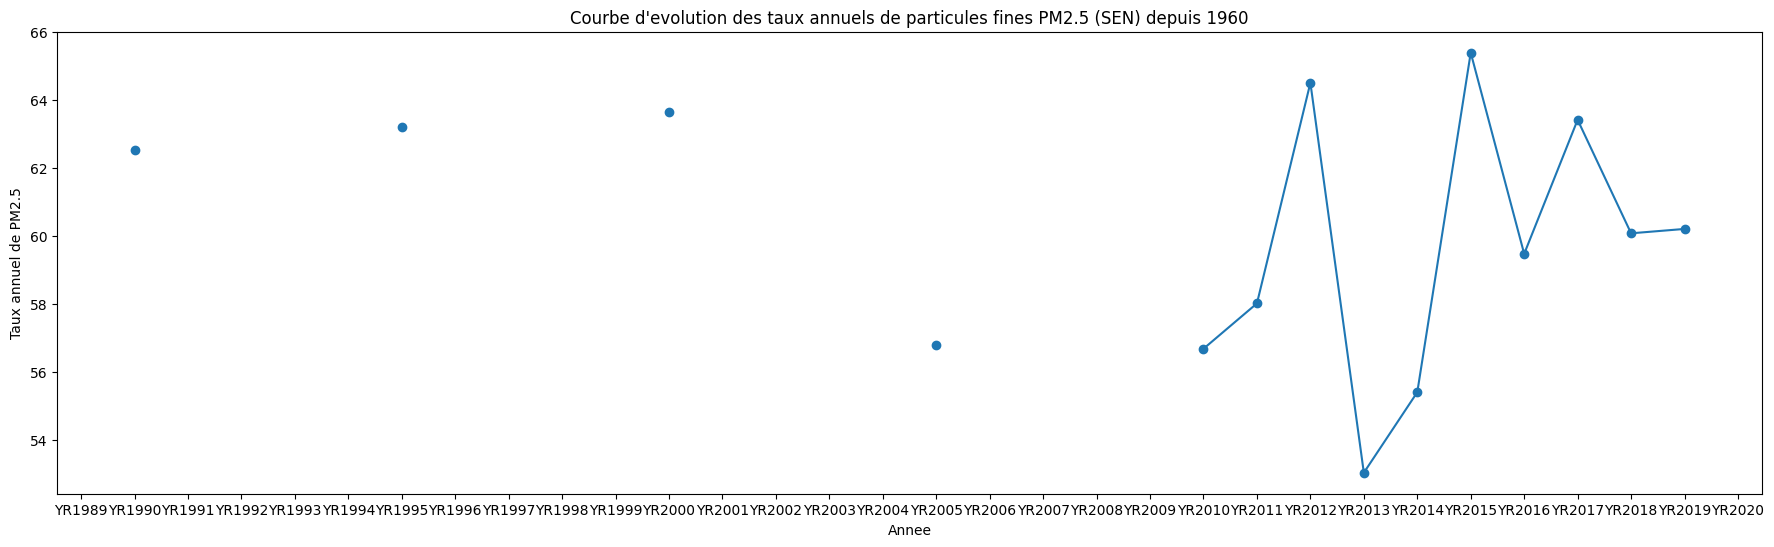

In [90]:
# Tracer l'histogramme des données
plt.figure(figsize =(22,6))
plt.plot(dataset1.index,dataset1['SEN'], marker='o', linestyle='-')
plt.xlabel('Annee')
plt.ylabel('Taux annuel de PM2.5')
plt.title('Courbe d\'evolution des taux annuels de particules fines PM2.5 (SEN) depuis 1960')
plt.show()

Text(0.5, 1.0, 'estimation de la densité pour la distribution des taux annuels de particules fines PM2.5 (SEN) depuis 1960')

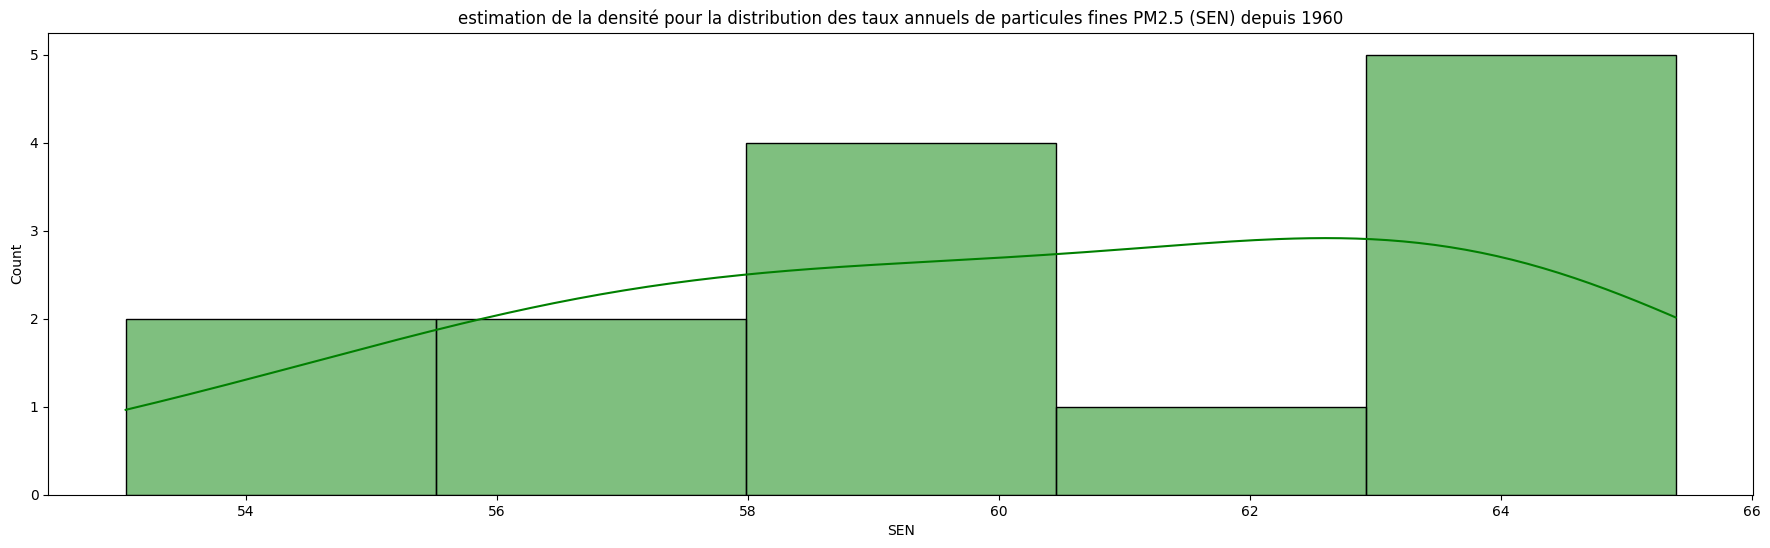

In [88]:
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plt.figure(figsize =(22,6))
sns.histplot(dataset1['SEN'], color='g', kde=True)
plt.title('estimation de la densité pour la distribution des taux annuels de particules fines PM2.5 (SEN) depuis 1960')

In [ ]:
!pip3 install missingno

#### Analyse des valeurs manquantes dans le dataset

In [94]:
#Taux de valeurs manquantes dans le dataset

taux_de_valeurs_manquant = dataset1.isnull().sum()
taux_de_valeurs_manquant

economy
SEN    49
dtype: int64

In [92]:
import missingno as msno

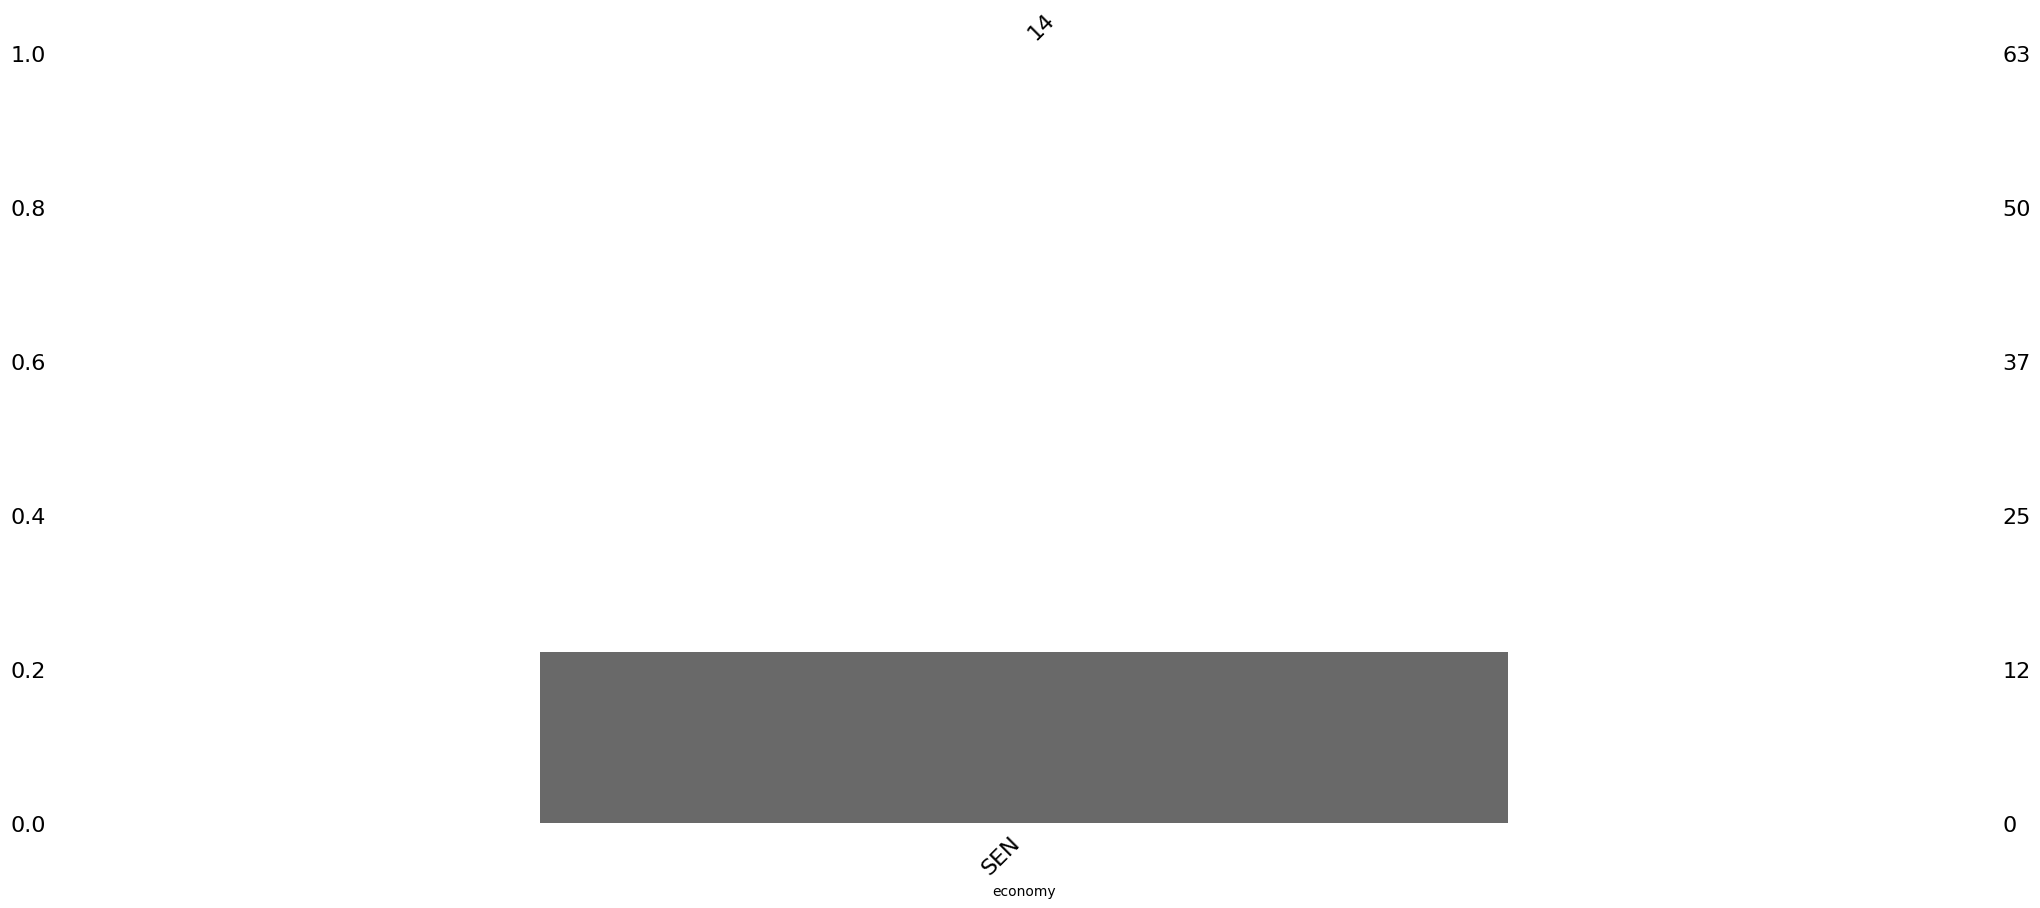

In [97]:
msno.bar(dataset1,
         filter="top",  # select only features that have a completion rate >= p
        );

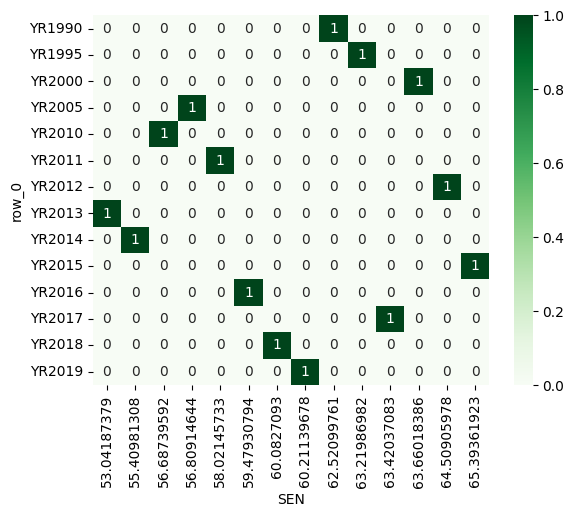

In [43]:
#Heatmap

sns.heatmap(pd.crosstab(index=dataset1.index, columns=dataset1['SEN'],
                        margins=False,
                        margins_name="Total", dropna=False),
            cmap="Greens", 
            annot=True,
            fmt='.2g',
           );

2. PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value (% of total)


"PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value (% of total)" fait référence à un indicateur de la qualité de l'air mesurant la proportion de la population d'un pays qui est exposée à des niveaux de pollution atmosphérique dépassant la valeur cible intérimaire 1 (Interim Target-1) fixée par l'Organisation mondiale de la santé (OMS) pour les particules fines PM2.5.
L'Interim Target-1 est l'une de ces valeurs cibles intérimaires spécifiques pour les PM2.5. Elle représente un niveau de concentration des PM2.5 considéré comme acceptable pour la santé publique. Dépasser cette valeur cible peut avoir des effets néfastes sur la santé de la population exposée.

##### Exploration donnees PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value

In [52]:
dataset2 = dict_dataframes['PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value (% of total)']

In [53]:
dataset2.head()

economy,SEN
YR1960,NaN
YR1961,NaN
YR1962,NaN
YR1963,NaN
YR1964,NaN


In [46]:
dataset2.describe()

economy,SEN
count,12.0
mean,100.0
std,0.0
min,100.0
25%,100.0
50%,100.0
75%,100.0
max,100.0


In [54]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, YR1960 to YR2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEN     12 non-null     float64
dtypes: float64(1)
memory usage: 1008.0+ bytes


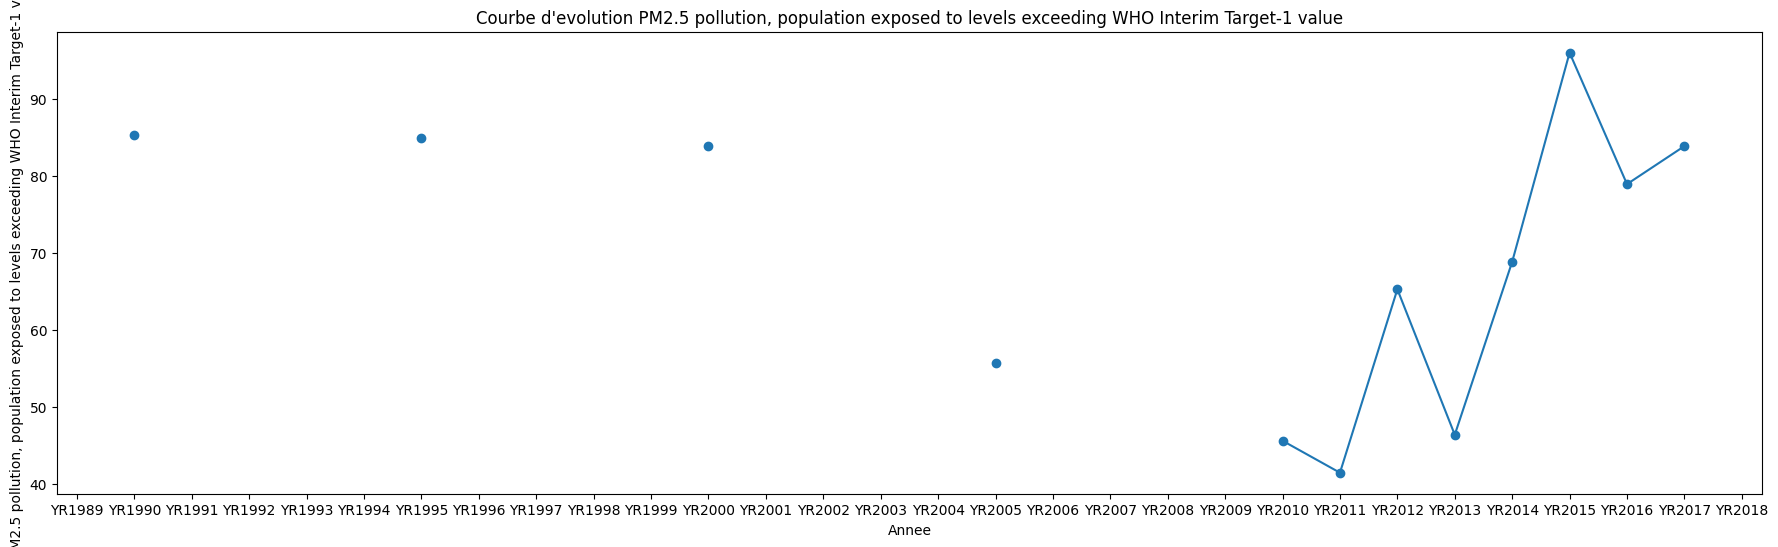

In [126]:
# Tracer l'histogramme des données
plt.figure(figsize=(22,6))
plt.plot(dataset2.index,dataset2['SEN'], marker='o', linestyle='-')
plt.xlabel('Annee')
plt.ylabel('PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value')
plt.title('Courbe d\'evolution PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value')
plt.show()

Text(0.5, 1.0, 'Distribution des taux annuels de population exposed to levels exceeding WHO Interim Target-1 value')

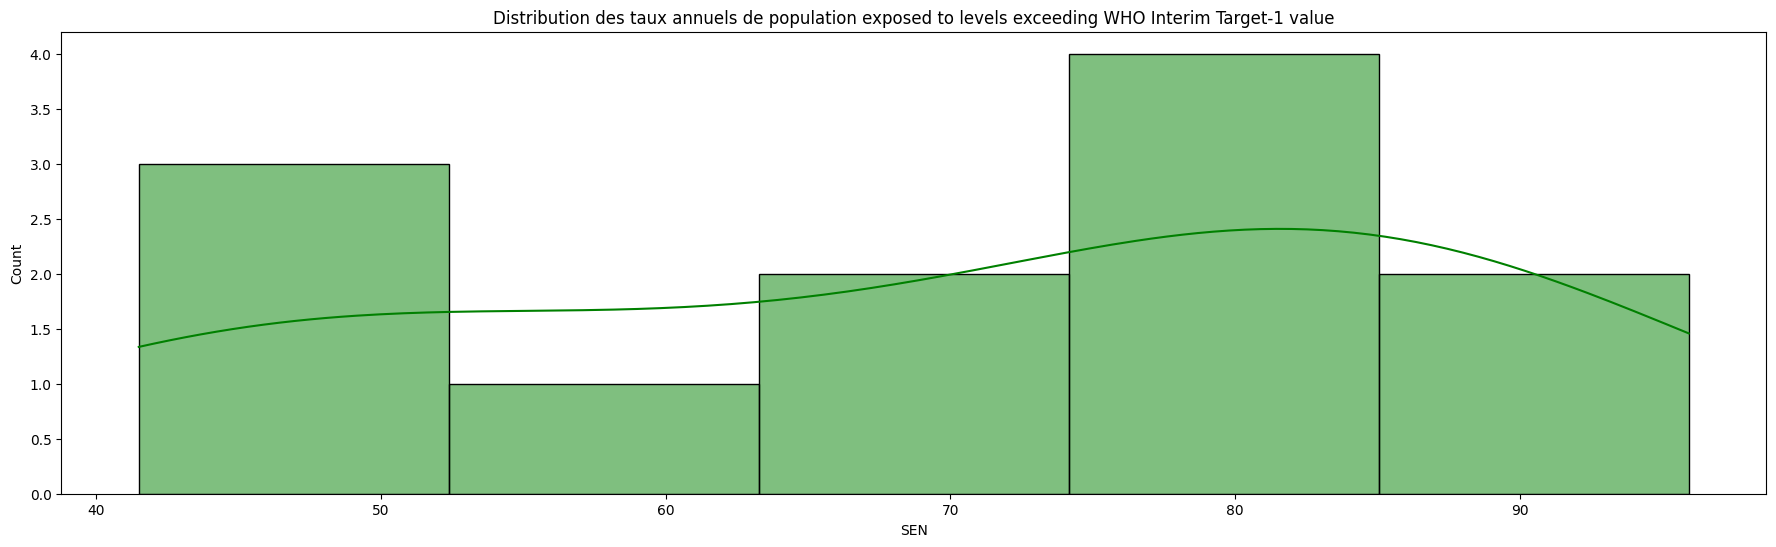

In [101]:
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plt.figure(figsize=(22,6))
sns.histplot(dataset2['SEN'], color='g', kde=True)
plt.title('Distribution des taux annuels de population exposed to levels exceeding WHO Interim Target-1 value')

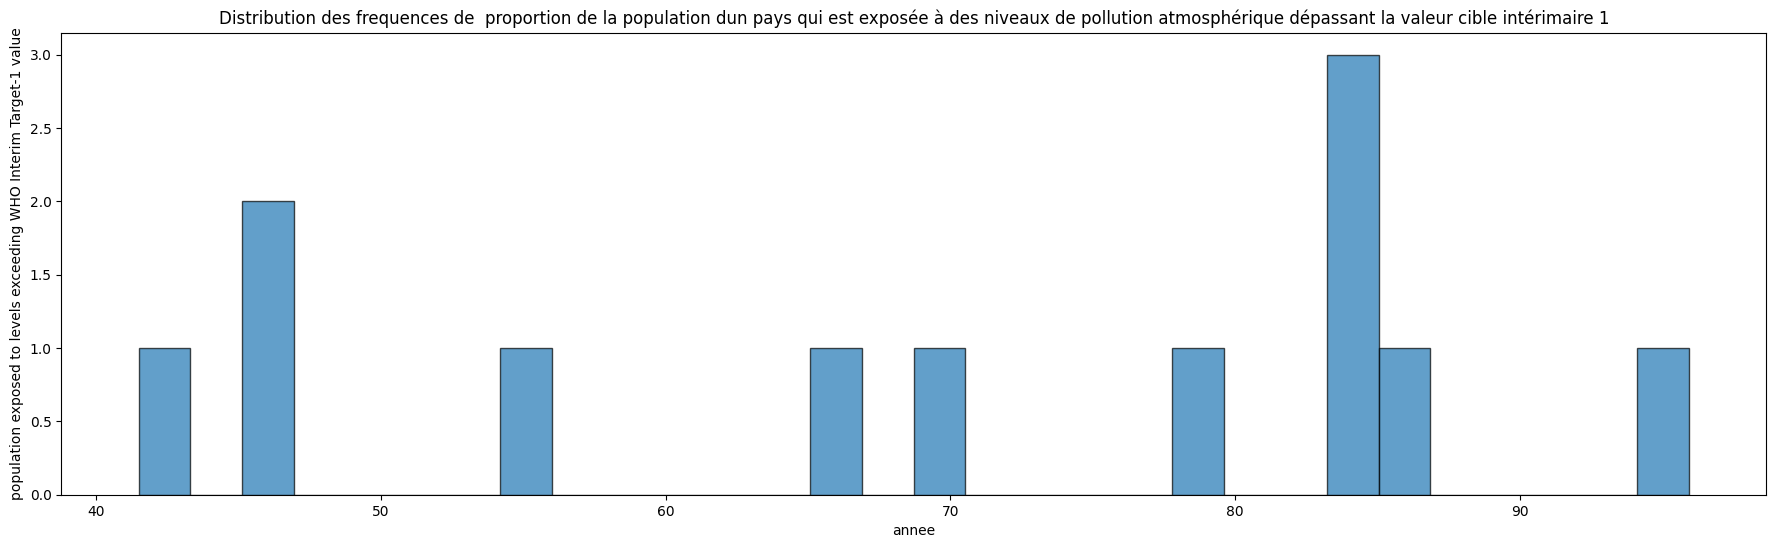

In [140]:
# Tracer l'histogramme des données
plt.figure(figsize=(22,6))
plt.hist(dataset2['SEN'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('annee')
plt.ylabel('population exposed to levels exceeding WHO Interim Target-1 value')
plt.title('Distribution des frequences de  proportion de la population dun pays qui est exposée à des niveaux de pollution atmosphérique dépassant la valeur cible intérimaire 1')
plt.show()

#### Analyse des valeurs manquantes dans le dataset

In [128]:
taux_de_valeurs_manquant = dataset2.isnull().sum()
taux_de_valeurs_manquant

economy
SEN    51
dtype: int64

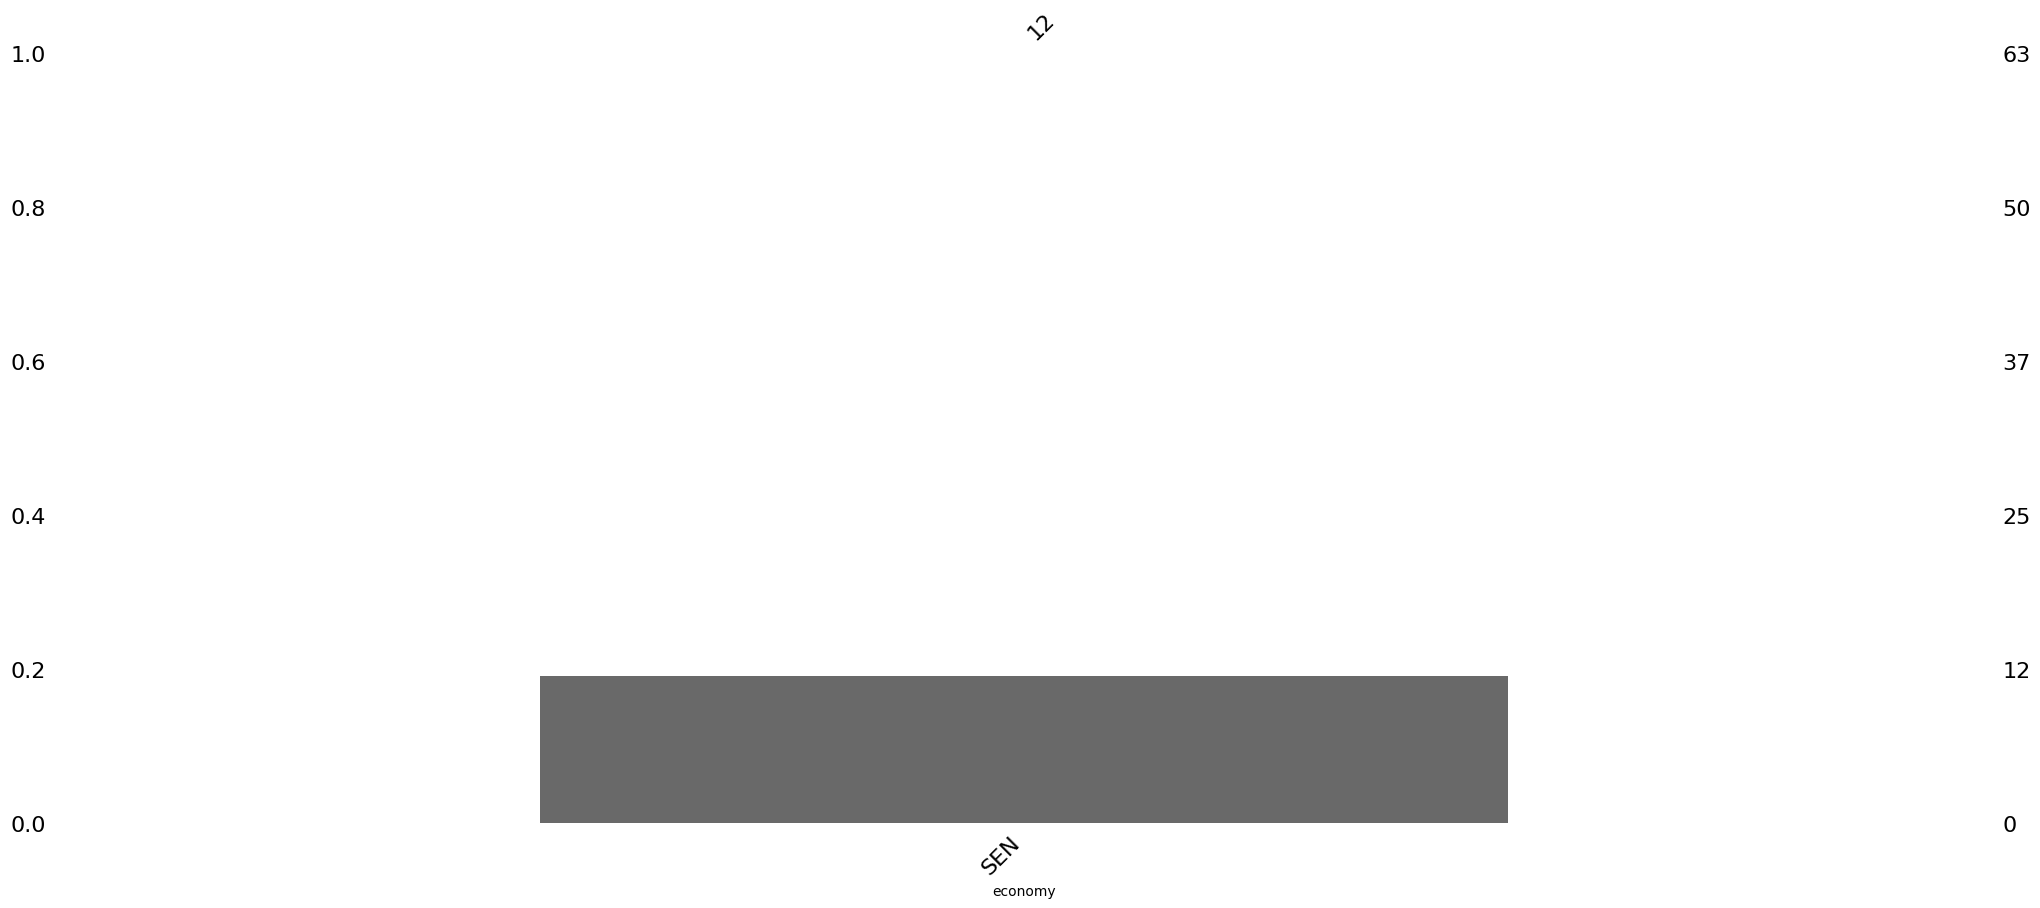

In [103]:
msno.bar(dataset2,
         filter="top",  # select only features that have a completion rate >= p
        );

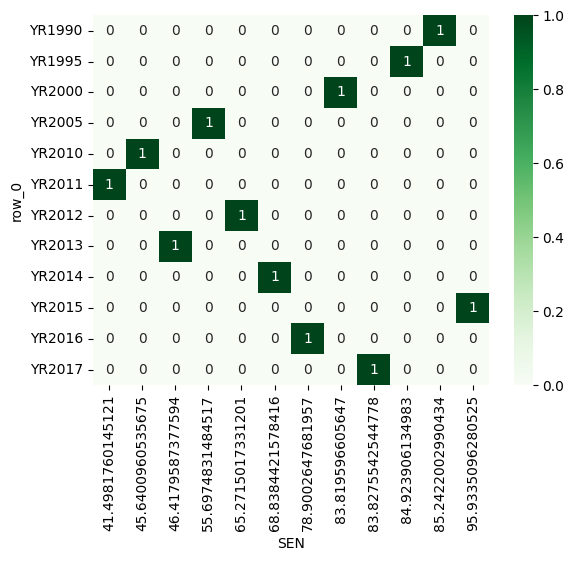

In [104]:
sns.heatmap(pd.crosstab(index=dataset2.index, columns=dataset2['SEN'],
                        margins=False,
                        margins_name="Total", dropna=False),
            cmap="Greens", 
            annot=True,
            fmt='.2g',
           );

3. PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-2 value (% of total)

Cet indicateur mesure la proportion de la population d'un pays qui est exposée à des niveaux de particules fines PM2.5 dépassant la valeur cible intérimaire 2 (Interim Target-2) établie par l'OMS. L'Interim Target-2 est une valeur cible spécifique pour les PM2.5 qui est plus stricte que l'Interim Target-1. Dépasser cette valeur cible peut indiquer une exposition plus élevée aux PM2.5 et peut avoir des conséquences néfastes pour la santé de la population exposée.

In [79]:
dataset3 = dict_dataframes['PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-2 value (% of total)']


#### Exploration des donnees PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-2 value

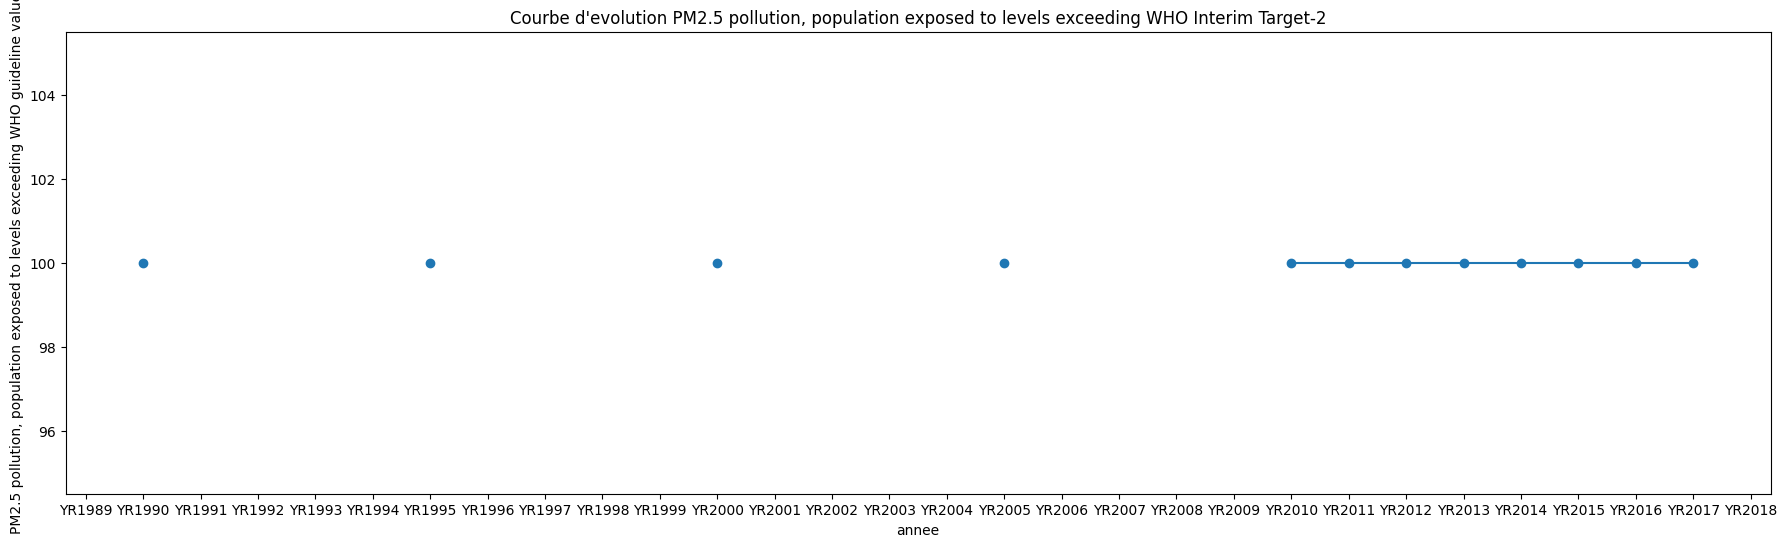

In [139]:
plt.figure(figsize=(22, 6))
plt.plot(dataset3.index,dataset3['SEN'], marker='o', linestyle='-')
plt.xlabel('annee')
plt.ylabel('PM2.5 pollution, population exposed to levels exceeding WHO guideline value')
plt.title('Courbe d\'evolution PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-2')
plt.show()

Text(0.5, 1.0, 'Distribution des taux annuels de population exposed to levels exceeding WHO Interim Target-2 value')

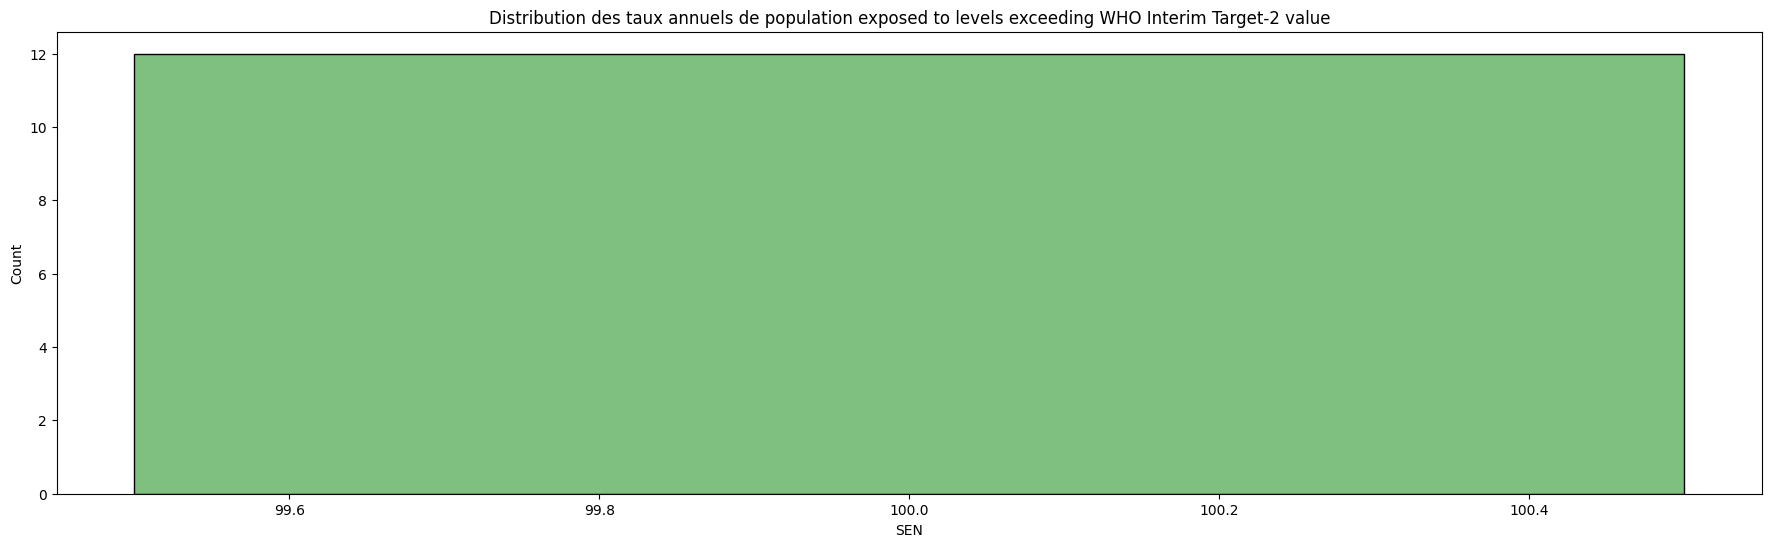

In [106]:
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plt.figure(figsize=(22,6))
sns.histplot(dataset3['SEN'], color='g', kde=True)
plt.title('Distribution des taux annuels de population exposed to levels exceeding WHO Interim Target-2 value')

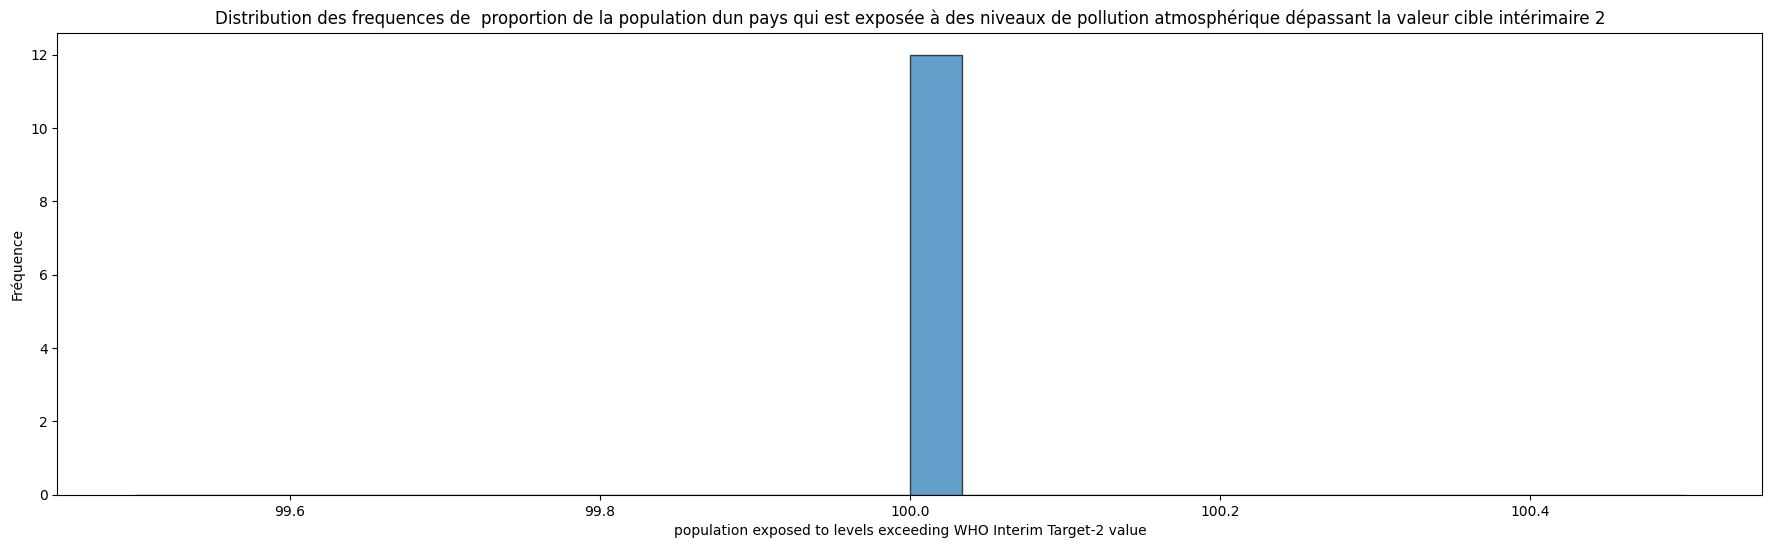

In [138]:
# Tracer l'histogramme des données
plt.figure(figsize=(22,6))
plt.hist(dataset3['SEN'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('population exposed to levels exceeding WHO Interim Target-2 value')
plt.ylabel('Fréquence')
plt.title('Distribution des frequences de  proportion de la population dun pays qui est exposée à des niveaux de pollution atmosphérique dépassant la valeur cible intérimaire 2')
plt.show()

#### Analyse des valeurs manquantes dans le dataset

In [108]:
taux_de_valeurs_manquant = dataset3.isnull().sum()
taux_de_valeurs_manquant

economy
SEN    51
dtype: int64

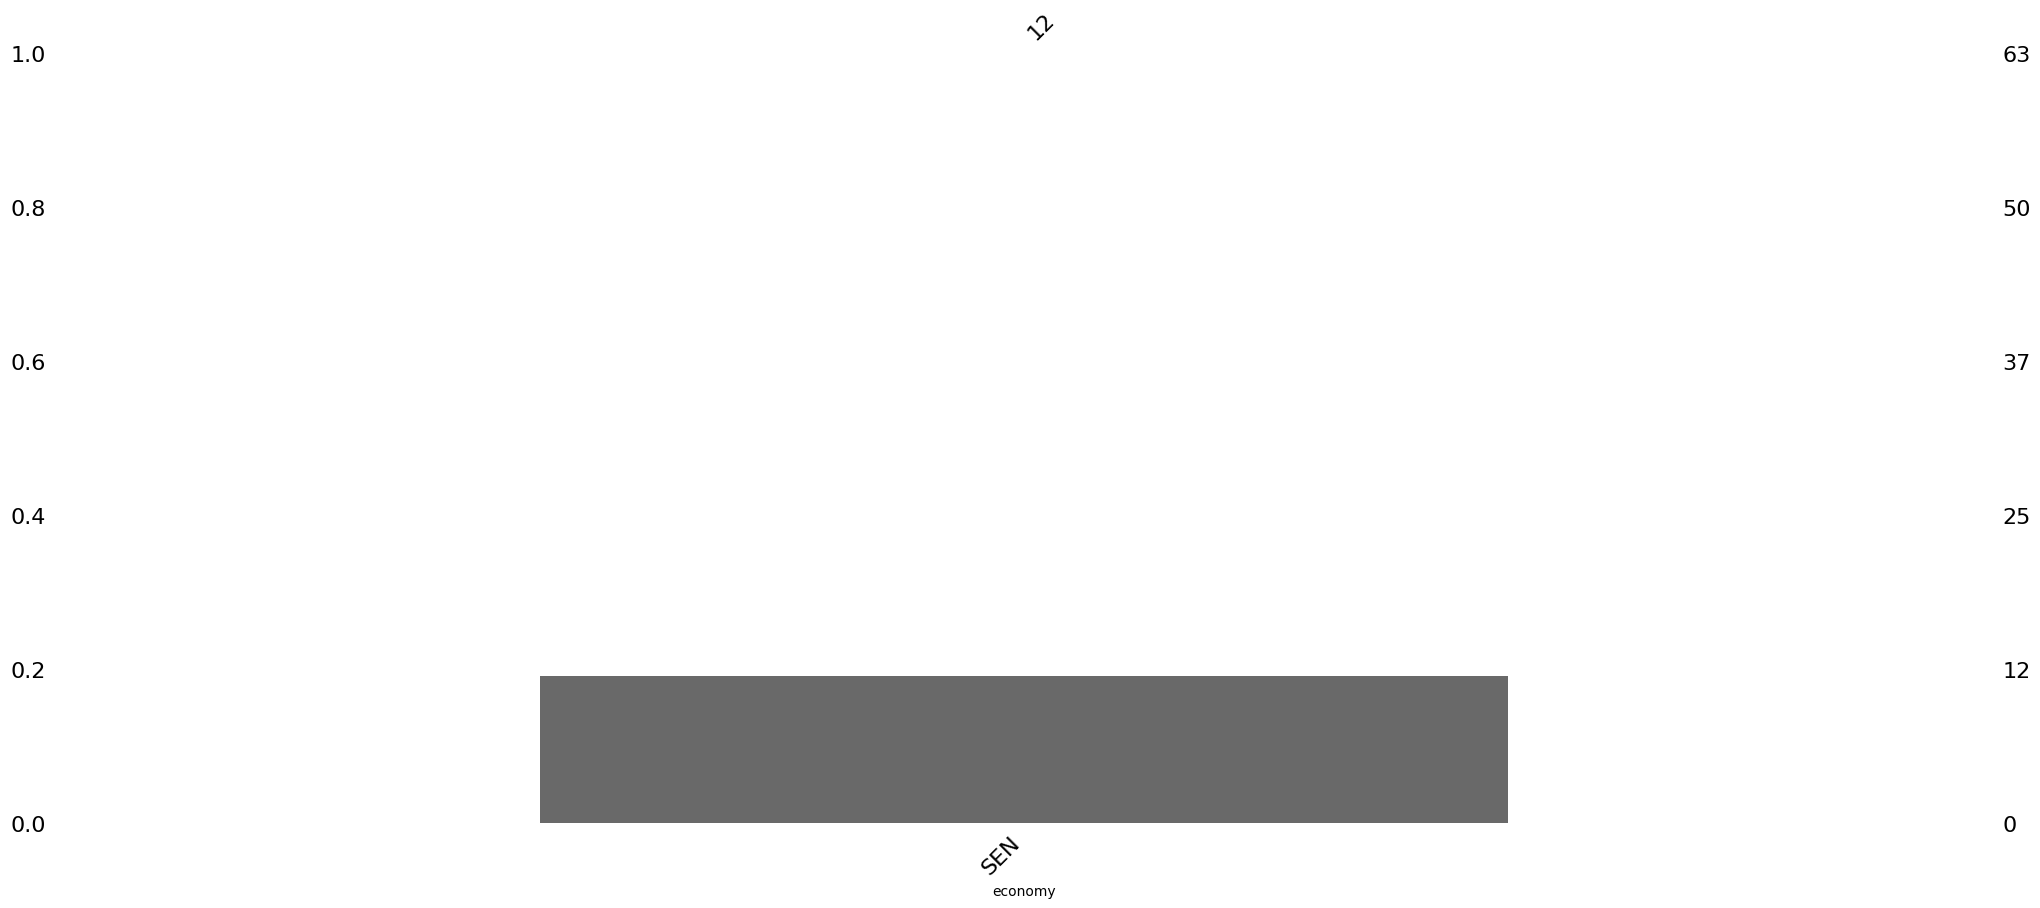

In [110]:
msno.bar(dataset3,
         filter="top",  # select only features that have a completion rate >= p
        );

4. PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-3 value (% of total) :

Cet indicateur mesure la proportion de la population d'un pays qui est exposée à des niveaux de particules fines PM2.5 dépassant la valeur cible intérimaire 3 (Interim Target-3) établie par l'OMS. L'Interim Target-3 est encore plus stricte que l'Interim Target-2. Dépasser cette valeur cible indique une exposition encore plus élevée aux PM2.5 et des risques accrus pour la santé des personnes exposées.

In [50]:
dataset4 = dict_dataframes['PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-3 value (% of total)']

#### Exploration des donnees PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-3 value

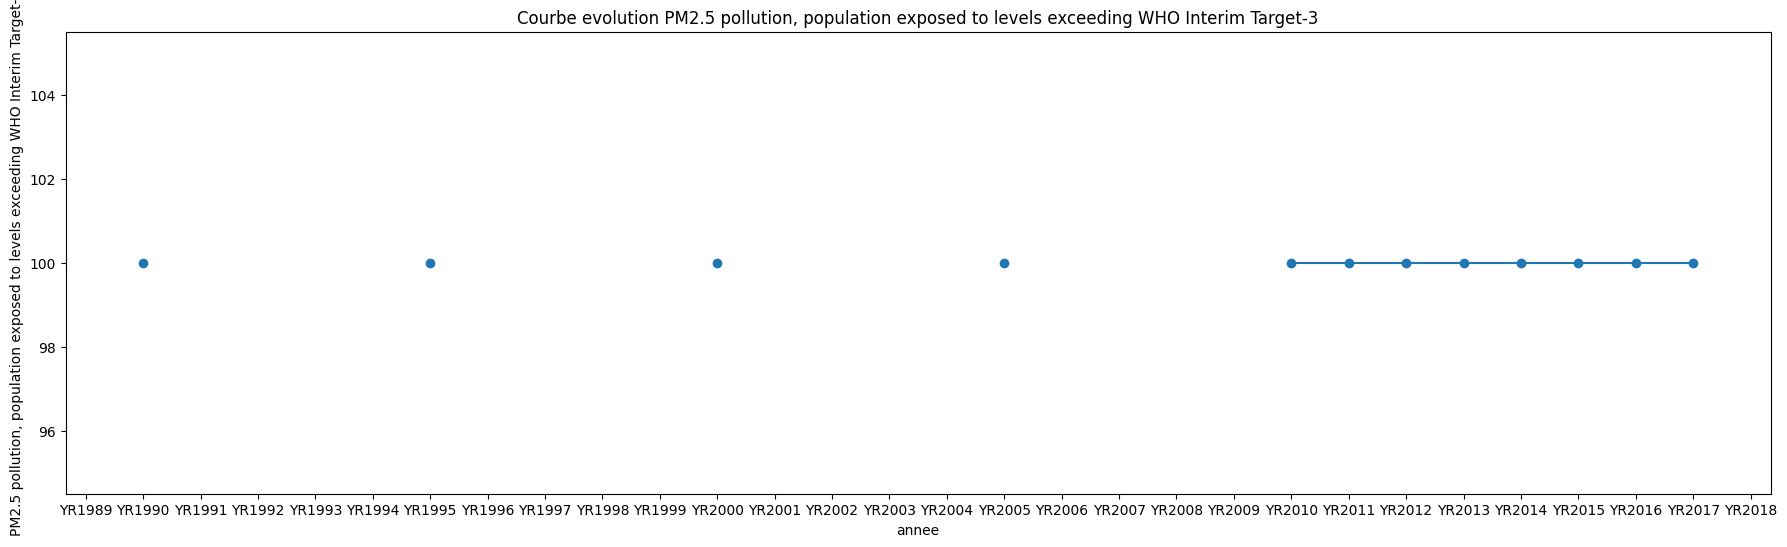

In [130]:
# Tracer l'histogramme des données
plt.figure(figsize=(22, 6))
plt.plot(dataset4.index,dataset4['SEN'], marker='o', linestyle='-')
plt.xlabel('annee')
plt.ylabel('PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-3')
plt.title('Courbe evolution PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-3')
plt.show()

Text(0.5, 1.0, 'Distribution des taux annuels de population exposed to levels exceeding WHO Interim Target-3 value')

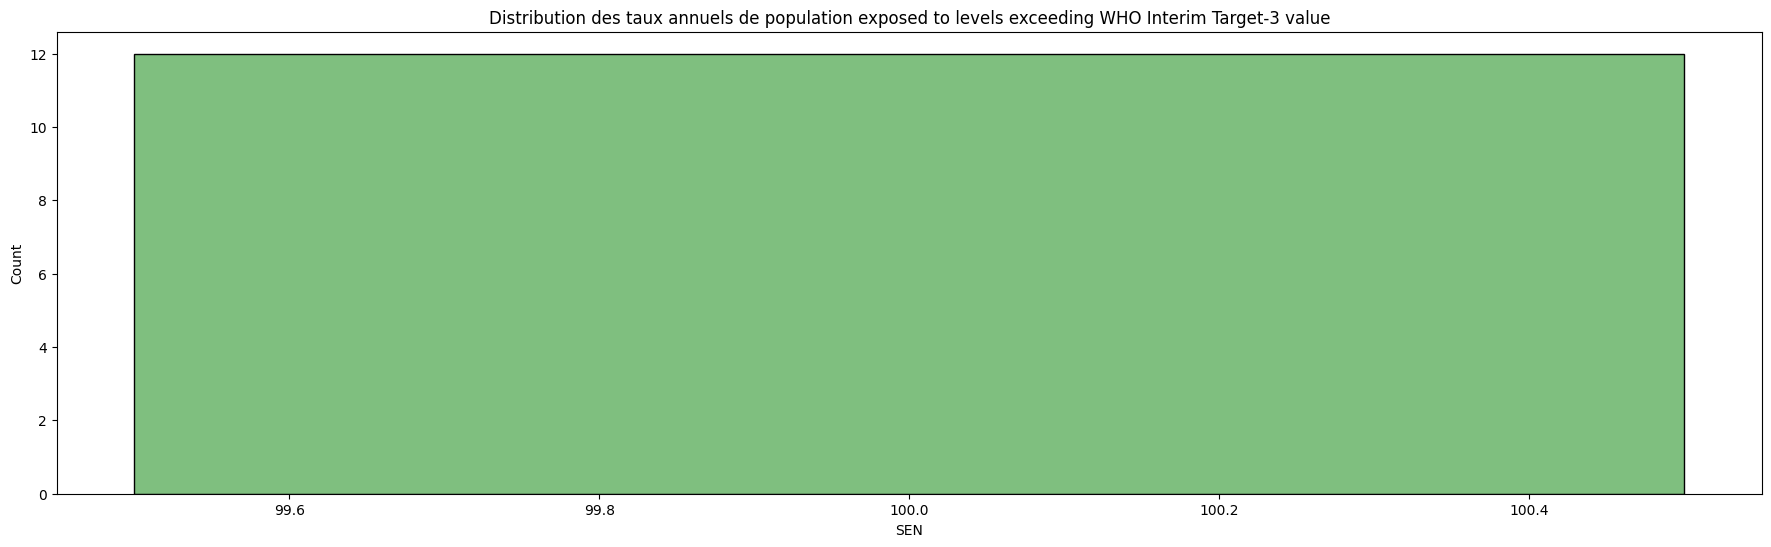

In [131]:
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plt.figure(figsize=(22,6))
sns.histplot(dataset4['SEN'], color='g', kde=True)
plt.title('Distribution des taux annuels de population exposed to levels exceeding WHO Interim Target-3 value')

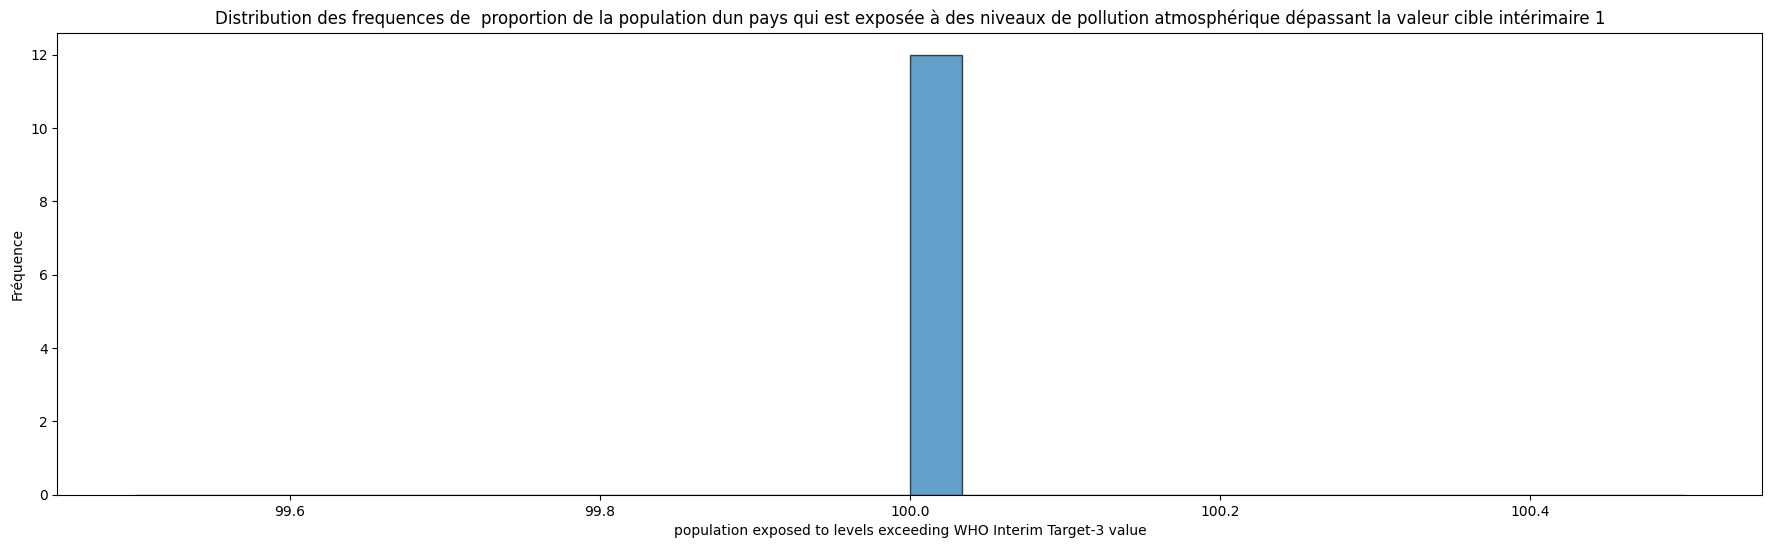

In [132]:
# Tracer l'histogramme des données
plt.figure(figsize=(22,6))
plt.hist(dataset4['SEN'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('population exposed to levels exceeding WHO Interim Target-3 value')
plt.ylabel('Fréquence')
plt.title('Distribution des frequences de  proportion de la population dun pays qui est exposée à des niveaux de pollution atmosphérique dépassant la valeur cible intérimaire 1')
plt.show()

#### Analyse des valeurs manquantes dans le dataset

In [133]:
taux_de_valeurs_manquant = dataset4.isnull().sum()
taux_de_valeurs_manquant

economy
SEN    51
dtype: int64

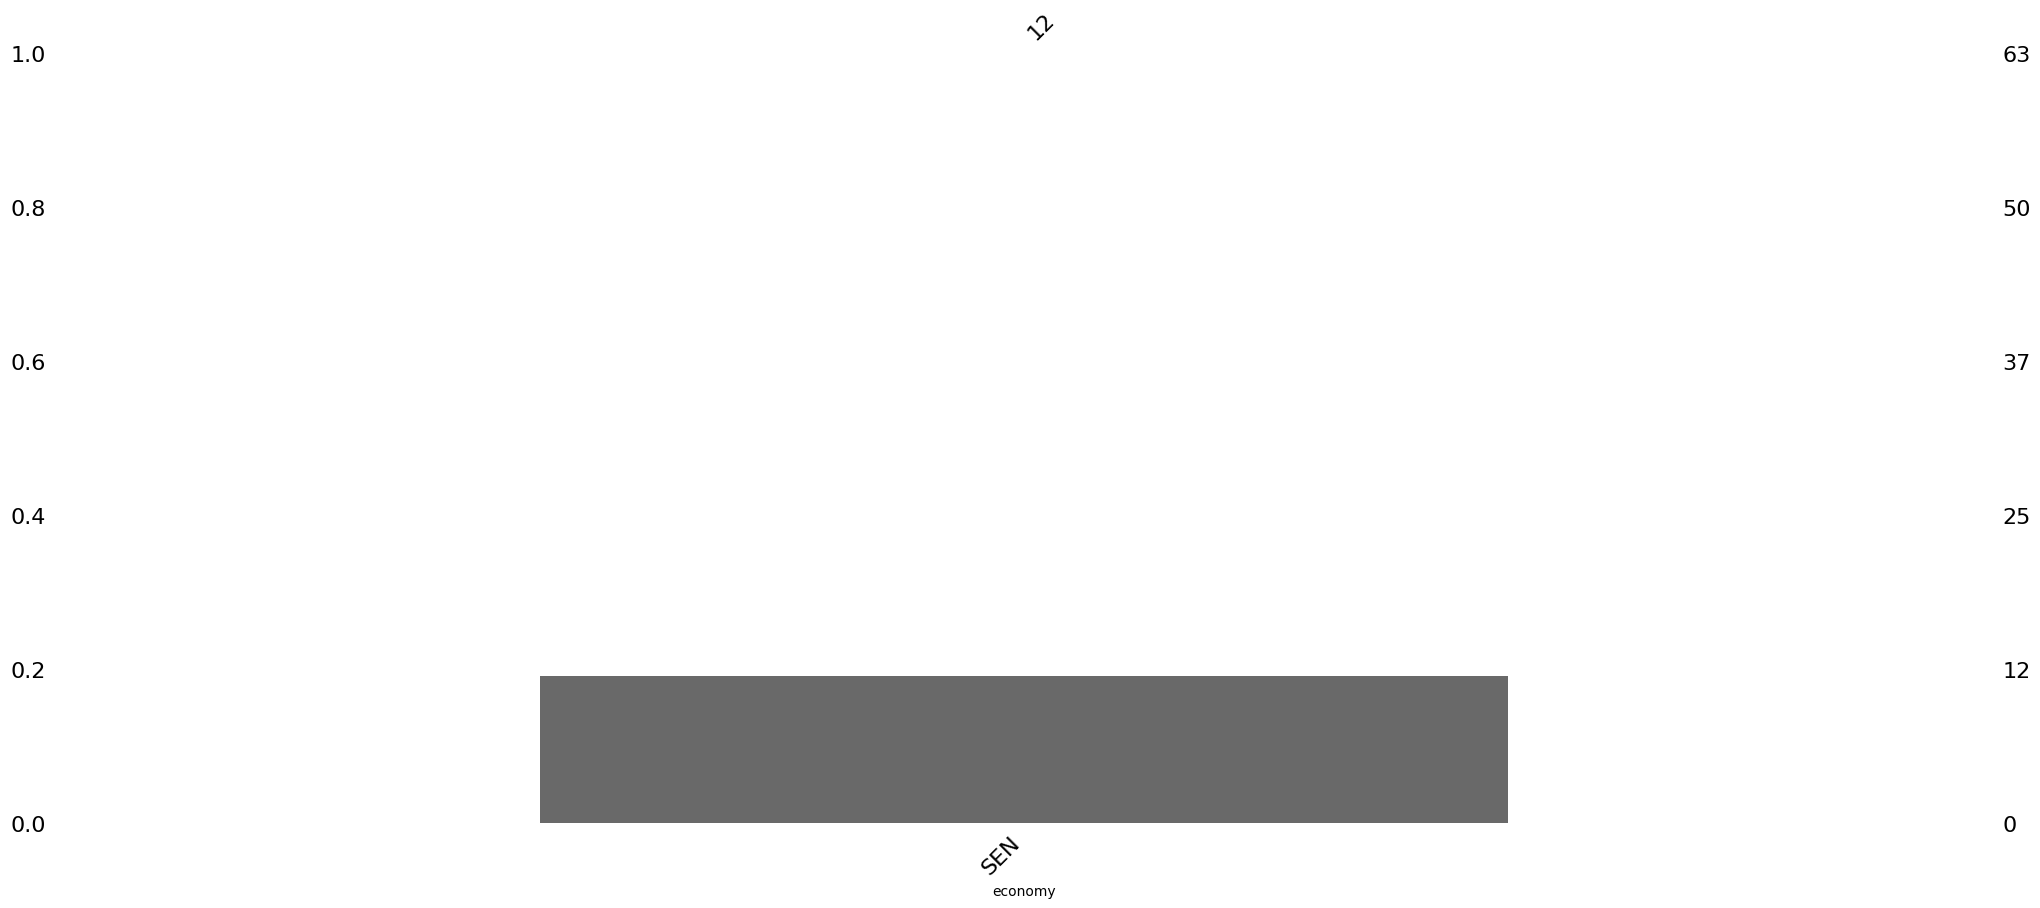

In [115]:
msno.bar(dataset4,
         filter="top",  # select only features that have a completion rate >= p
        );

5. PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) :

Cet indicateur mesure la proportion de la population d'un pays qui est exposée à des niveaux de particules fines PM2.5 dépassant la valeur limite (guideline value) établie par l'OMS. La valeur limite de l'OMS est une valeur cible pour les PM2.5 considérée comme étant sécuritaire pour la santé publique. Dépasser cette valeur limite peut indiquer des niveaux élevés de pollution atmosphérique et des risques accrus pour la santé respiratoire des personnes exposées.

In [51]:
dataset5 = dict_dataframes['PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)']

#### Exploration des donnees PM2.5 pollution, population exposed to levels exceeding WHO guideline value

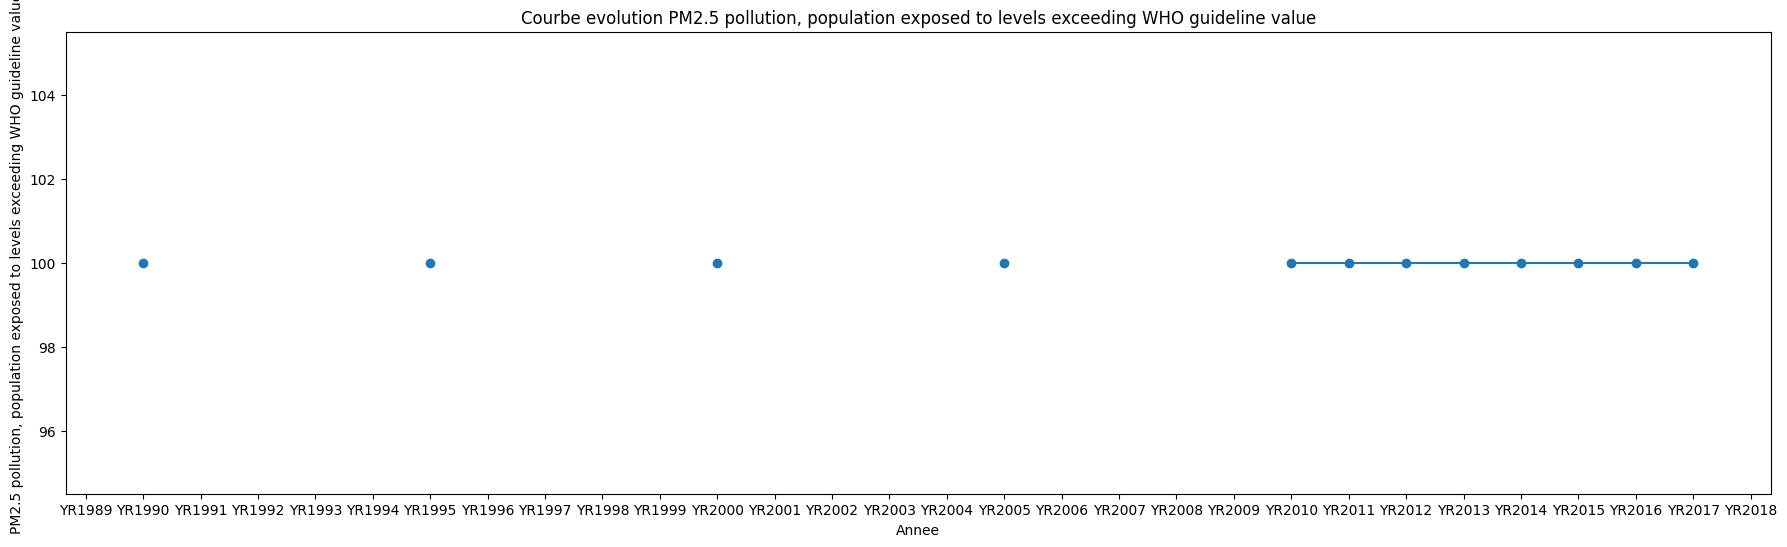

In [137]:
# Tracer l'histogramme des données
plt.figure(figsize=(22, 6))
plt.plot(dataset5.index,dataset5['SEN'], marker='o', linestyle='-')
plt.xlabel( 'Annee')
plt.ylabel('PM2.5 pollution, population exposed to levels exceeding WHO guideline value')
plt.title('Courbe evolution PM2.5 pollution, population exposed to levels exceeding WHO guideline value')
plt.show()

Text(0.5, 1.0, 'Distribution des taux annuels de population exposed to levels exceeding WHO guideline value')

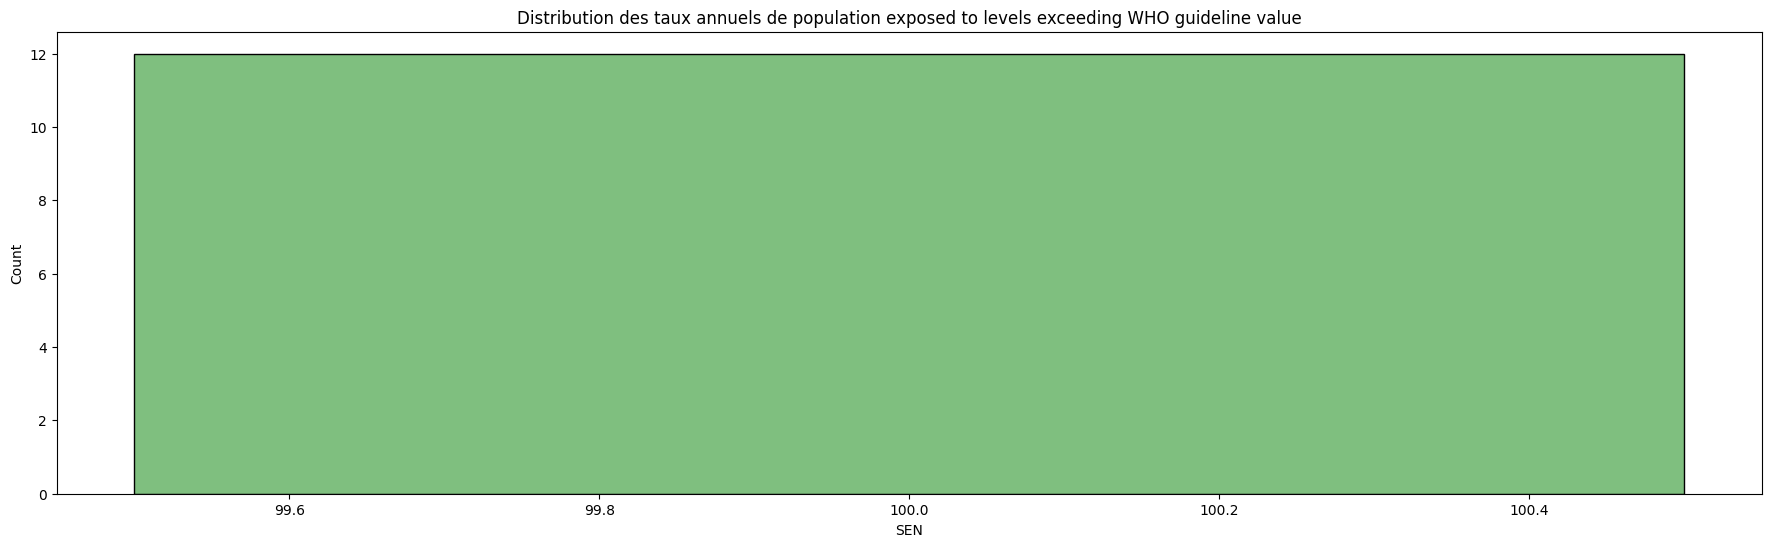

In [135]:
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plt.figure(figsize=(22,6))
sns.histplot(dataset5['SEN'], color='g', kde=True)
plt.title('Distribution des taux annuels de population exposed to levels exceeding WHO guideline value')

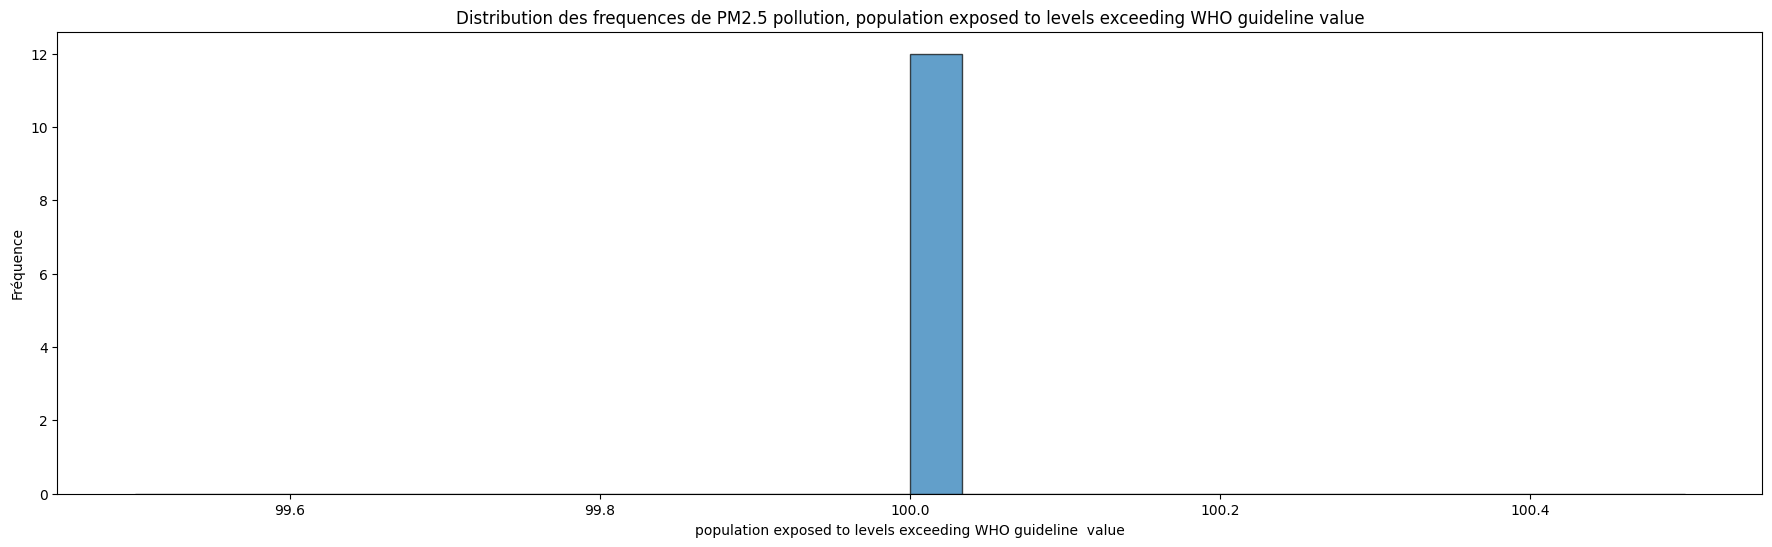

In [136]:
# Tracer l'histogramme des données
plt.figure(figsize=(22,6))
plt.hist(dataset5['SEN'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('population exposed to levels exceeding WHO guideline  value')
plt.ylabel('Fréquence')
plt.title('Distribution des frequences de PM2.5 pollution, population exposed to levels exceeding WHO guideline value')
plt.show()

#### Analyse des valeurs manquantes dans le dataset

In [120]:
taux_de_valeurs_manquant = dataset4.isnull().sum()
taux_de_valeurs_manquant

economy
SEN    51
dtype: int64

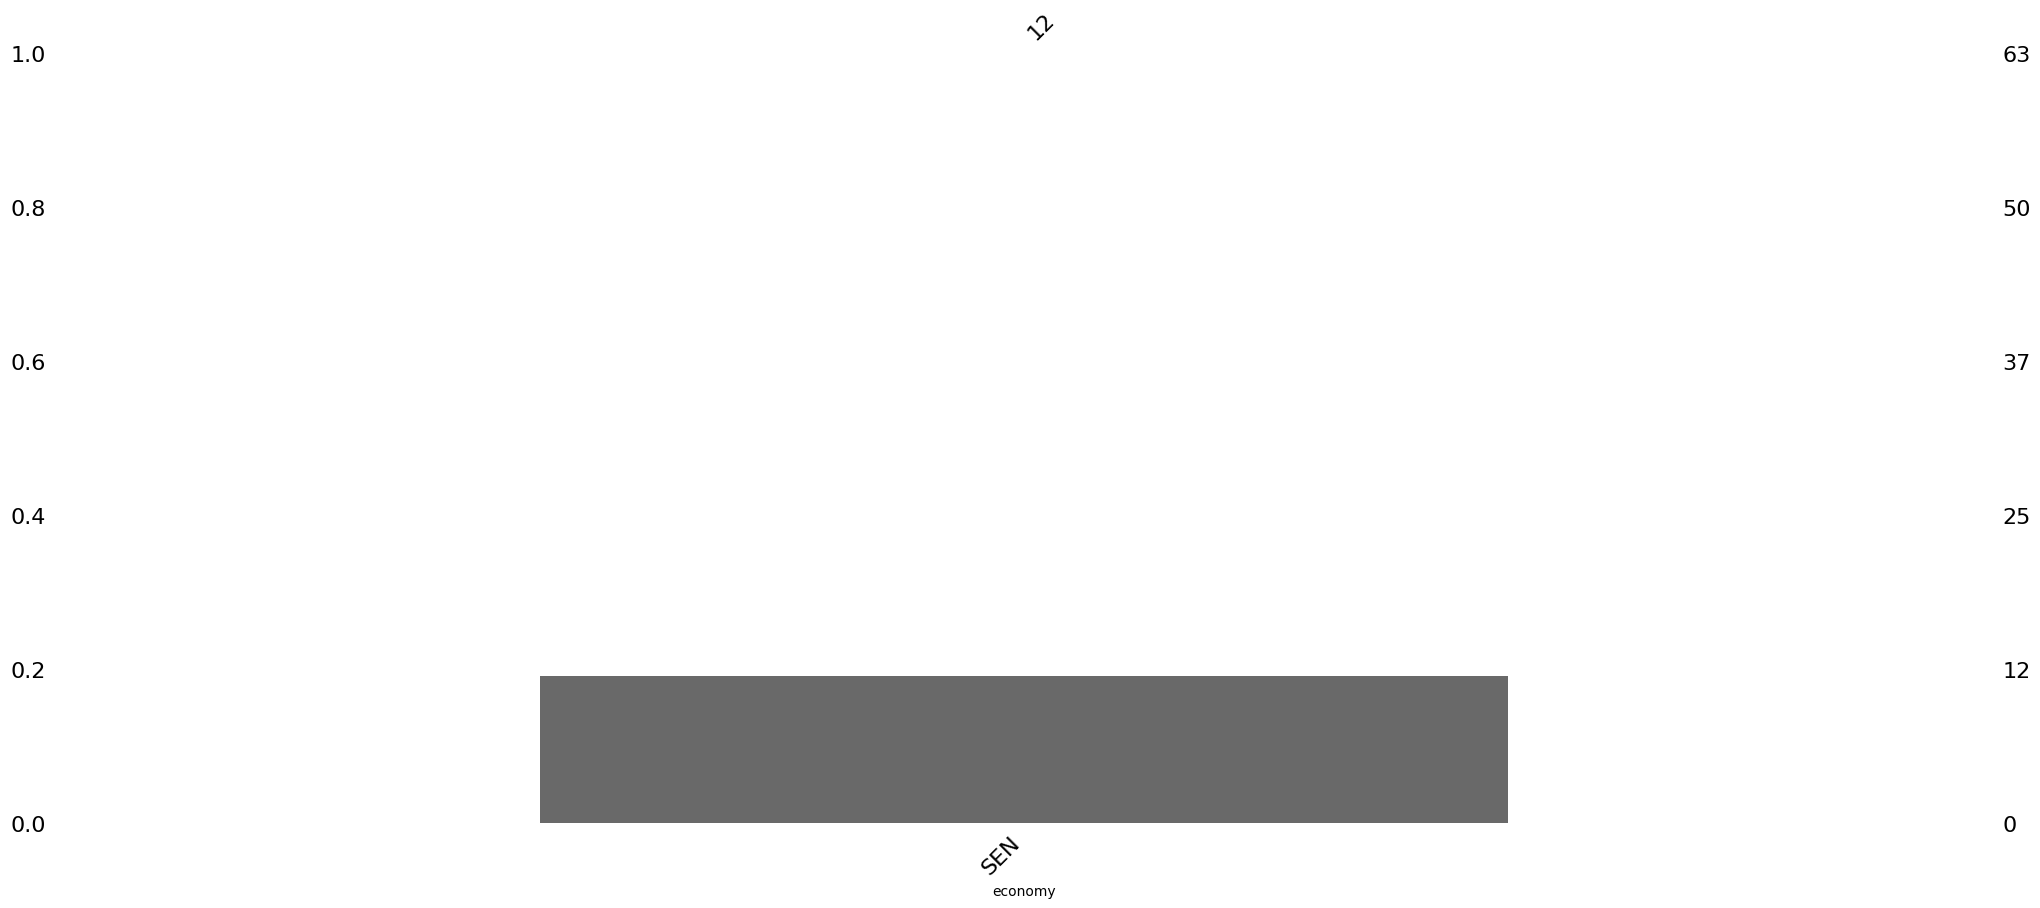

In [121]:
msno.bar(dataset5,
         filter="top",  # select only features that have a completion rate >= p
        );

### Conclusion sur les donnees de la banque mondiale

Apres cette vue d'ensemble des donnees, nous avons decide de:
- regrouper l'ensemble des datasets dans un seul dataset pour une completude des donnees
- de faire une inference par la moyenne des valeurs manquantes au vu de la distribution des donnees 


Un certain nombre d'operations de traitement sont necessaires pour arriver au resultat d'un dataset exploitable. Ces traitement sont effectues au niveau du "Transform" de notre script de dags

### WAQI API

L'API WAQI (World Air Quality Index) est un service en ligne qui fournit des données sur l'indice de la qualité de l'air (AQI) à l'échelle mondiale. L'indice de qualité de l'air (AQI) est un indicateur standardisé utilisé pour communiquer les niveaux de pollution de l'air et les impacts potentiels sur la santé humaine.

L'API WAQI permet d'accéder à des données en temps réel et historiques sur la qualité de l'air dans différentes villes et régions du monde. Elle fournit des informations sur divers polluants atmosphériques tels que les particules fines (PM2.5 et PM10), l'ozone (O3), le dioxyde de soufre (SO2), le dioxyde d'azote (NO2), le monoxyde de carbone (CO) et bien d'autres.

En utilisant l'API WAQI, vous pouvez obtenir des informations telles que :

L'indice de qualité de l'air global (AQI) pour une ville ou une région spécifique.
Les concentrations actuelles de différents polluants atmosphériques.
Les niveaux de pollution de l'air au fil du temps (données historiques).
Des informations sur les sources de données et les sources de surveillance de la qualité de l'air.
Vous pouvez utiliser cette API pour obtenir des données sur la qualité de l'air pour des besoins de recherche, d'analyse, de visualisation ou pour créer des applications et des services qui fournissent des informations sur la qualité de l'air aux utilisateurs.

Pour accéder à l'API WAQI, vous devez vous inscrire sur le site Web de WAQI et obtenir une clé API (API key) pour accéder aux données. Ensuite, vous pouvez effectuer des requêtes HTTP vers les points d'extrémité (endpoints) de l'API pour récupérer les données sur la qualité de l'air.

Documentation: https://aqicn.org/api/fr/

En utilisant cette api, nous obtenons les donnees sur la qualite de l'air de Dakar(SEN)(pm2.5, pm10, o3), pour aujourd'hui et les 8 prochains jours pour les valeurs (average, min, max)

Voici un apercu, des donnees en sortie de l'api:


In [ ]:
"""
    {
    "status": "ok",
    "data": {
        "aqi": 119,
        "idx": 1451,
        "attributions": [
            {
                "url": "http://www.bjmemc.com.cn/",
                "name": "Beijing Environmental Protection Monitoring Center (北京市环境保护监测中心)"
            },
            {
                "url": "https://waqi.info/",
                "name": "World Air Quality Index Project"
            }
        ],
        "city": {
            "geo": [
                39.954592,
                116.468117
            ],
            "name": "Beijing (北京)",
            "url": "https://aqicn.org/city/beijing",
            "location": ""
        },
        "dominentpol": "pm25",
        "iaqi": {
            "co": {
                "v": 7.3
            },
            "h": {
                "v": 78
            },
            "no2": {
                "v": 7.4
            },
            "o3": {
                "v": 91.6
            },
            "p": {
                "v": 1009
            },
            "pm10": {
                "v": 62
            },
            "pm25": {
                "v": 119
            },
            "so2": {
                "v": 0.6
            },
            "t": {
                "v": 28
            },
            "w": {
                "v": 1.5
            }
        },
        "time": {
            "s": "2023-07-25 23:00:00",
            "tz": "+08:00",
            "v": 1690326000,
            "iso": "2023-07-25T23:00:00+08:00"
        },
        "forecast": {
            "daily": {
                "o3": [
                    {
                        "avg": 11,
                        "day": "2023-07-23",
                        "max": 67,
                        "min": 1
                    },
                    {
                        "avg": 6,
                        "day": "2023-07-24",
                        "max": 57,
                        "min": 1
                    },
                    {
                        "avg": 6,
                        "day": "2023-07-25",
                        "max": 28,
                        "min": 1
                    },
                    {
                        "avg": 5,
                        "day": "2023-07-26",
                        "max": 33,
                        "min": 1
                    },
                    {
                        "avg": 1,
                        "day": "2023-07-27",
                        "max": 8,
                        "min": 1
                    },
                    {
                        "avg": 2,
                        "day": "2023-07-28",
                        "max": 14,
                        "min": 1
                    },
                    {
                        "avg": 4,
                        "day": "2023-07-29",
                        "max": 20,
                        "min": 1
                    },
                    {
                        "avg": 1,
                        "day": "2023-07-30",
                        "max": 1,
                        "min": 1
                    }
                ],
                "pm10": [
                    {
                        "avg": 67,
                        "day": "2023-07-24",
                        "max": 73,
                        "min": 58
                    },
                    {
                        "avg": 85,
                        "day": "2023-07-25",
                        "max": 121,
                        "min": 58
                    },
                    {
                        "avg": 82,
                        "day": "2023-07-26",
                        "max": 119,
                        "min": 58
                    },
                    {
                        "avg": 52,
                        "day": "2023-07-27",
                        "max": 90,
                        "min": 44
                    },
                    {
                        "avg": 39,
                        "day": "2023-07-28",
                        "max": 57,
                        "min": 20
                    },
                    {
                        "avg": 36,
                        "day": "2023-07-29",
                        "max": 57,
                        "min": 19
                    },
                    {
                        "avg": 30,
                        "day": "2023-07-30",
                        "max": 46,
                        "min": 19
                    },
                    {
                        "avg": 23,
                        "day": "2023-07-31",
                        "max": 28,
                        "min": 19
                    }
                ],
                "pm25": [
                    {
                        "avg": 149,
                        "day": "2023-07-24",
                        "max": 159,
                        "min": 138
                    },
                    {
                        "avg": 154,
                        "day": "2023-07-25",
                        "max": 159,
                        "min": 138
                    },
                    {
                        "avg": 158,
                        "day": "2023-07-26",
                        "max": 159,
                        "min": 154
                    },
                    {
                        "avg": 133,
                        "day": "2023-07-27",
                        "max": 152,
                        "min": 89
                    },
                    {
                        "avg": 116,
                        "day": "2023-07-28",
                        "max": 150,
                        "min": 68
                    },
                    {
                        "avg": 109,
                        "day": "2023-07-29",
                        "max": 157,
                        "min": 68
                    },
                    {
                        "avg": 92,
                        "day": "2023-07-30",
                        "max": 136,
                        "min": 65
                    },
                    {
                        "avg": 74,
                        "day": "2023-07-31",
                        "max": 89,
                        "min": 42
                    }
                ],
                "uvi": [
                    {
                        "avg": 0,
                        "day": "2022-10-24",
                        "max": 1,
                        "min": 0
                    }
                ]
            }
        },
        "debug": {
            "sync": "2023-07-26T00:42:50+09:00"
        }
    }
}
    """

Pour les besoins des graphes, un certain nombre de pretraitements ont ete effectue sur les donnees. Ces pretraitements entrent dans la partie "Transform" de notre dag